In [110]:
import numpy as np
import matplotlib.pyplot as plt

fractals = {"sierpinski": {"prob": np.array([1/3, 1/3, 1/3]),
                           "m": np.array([[0.5, 0, 0, 0.5, 0.25, np.sqrt(3.) / 4],
                                          [0.5, 0, 0, 0.5, 0, 0],
                                          [0.5, 0, 0, 0.5, 0.5, 0]])},
            "fern": {"prob": np.array([0.02, 0.09, 0.10, 0.79]),
                     "m": np.array([[0.001, 0.0, 0.0, 0.16, 0.0, 0.0],
                                    [-0.15, 0.28, 0.26, 0.24, 0.0, 0.44],
                                    [0.2, -0.26, 0.23, 0.22, 0.0, 1.6],
                                    [0.85, 0.04, -0.04, 0.85, 0.0, 1.6]])},
            "dragon": {"prob": np.array([0.787473, 0.212527]),
                       "m": np.array([[0.824074, 0.281482, -0.212346, 0.864198, -1.882290, -0.110607],
                                      [0.088272, 0.520988, -0.463889, -0.377778, 0.785360, 8.095795]])},
            "levy": {"prob": np.array([1/2, 1/2]),
                     "m": np.array([[0.5, -0.5, 0.5, 0.5, 0.0, 0.0],
                                    [0.5, 0.5, -0.5, 0.5, 0.5, 0.5]])
                     }}

def plot_fractal(x, y):
    fig, ax = plt.subplots()
    ax.set_facecolor('black')

    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='both', which='both', length=0)
    plt.scatter(x, y, s=1, marker="o", lw=0, c="green")

    ax.set_xticks([])
    ax.set_yticks([])
    

    return fig, ax


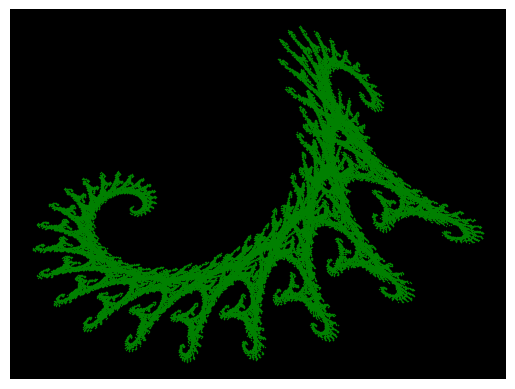

In [111]:
fractal_type = "dragon"
probs = fractals[fractal_type]["prob"]
m_values = fractals[fractal_type]["m"]



x_list = []
y_list = []

x_list.append(0)
y_list.append(0)

x = 0
y = 0

for i in range(100000):
    
    rand_idx = np.random.choice(np.arange(len(m_values)), p=probs)
    m_chosen = m_values[rand_idx]

    x2 =  m_chosen[0]*x + m_chosen[1]*y + m_chosen[4]
    y2 =  m_chosen[2]*x + m_chosen[3]*y + m_chosen[5]

    
    x_list.append(x2)
    y_list.append(y2)

    x = x2
    y =y2


fig, ax = plot_fractal(x_list, y_list)

plt.savefig(f'{fractal_type}.png')
plt.show()


In [112]:
log_Nr_points = []
r = 15
r_range = np.arange(1, r+1, 1)

x_list = np.array(x_list)
y_list = np.array(y_list)

for i in range(r):
    xbins = 2**i
    ybins = 2**i
    hist, xedges, yedges = np.histogram2d(
        x_list, y_list,
        bins=[xbins, ybins], 
        range=[[x_list.min(), x_list.max()], [y_list.min(), y_list.max()]])
    
    bins_with_points = np.sum(hist>0)
    log_Nr_points.append(np.log(bins_with_points))


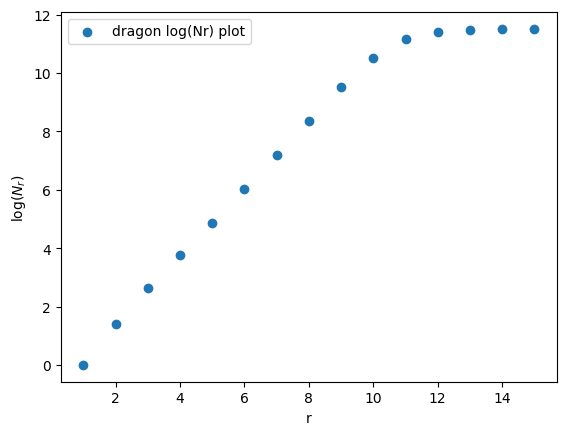

In [113]:
plt.scatter(r_range, log_Nr_points, label=f'{fractal_type} log(Nr) plot')
plt.xlabel(r'r')
plt.ylabel(r'$\log(N_{r})$')
plt.legend()
plt.savefig(f'{fractal_type}_log.png')

In [114]:
#plt.imshow(hist.T, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', cmap='Blues', interpolation='nearest')
#plt.colorbar(label='Counts')
#plt.xlabel('X-axis')
#plt.ylabel('Y-axis')
#plt.title('2D Histogram')
#plt.show()